In [2]:
import os 
import pickle
import torch

import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [ ]:
# original data loading
def load_data_original(data_dir):
    train = pd.read_csv(os.path.join(data_dir, "train.csv"))
    data0 = pd.read_parquet(os.path.join(data_dir, "train_image_data_0.parquet"))
    data1 = pd.read_parquet(os.path.join(data_dir, "train_image_data_1.parquet"))
    data2 = pd.read_parquet(os.path.join(data_dir, "train_image_data_2.parquet"))
    data3 = pd.read_parquet(os.path.join(data_dir, "train_image_data_3.parquet"))
    return train, data0, data1, data2, data3 

data_dir = "../data"
train, data0, data1, data2, data3 = load_data_original(data_dir)
df_iamge_full = pd.concat([data0,data1,data2,data3],ignore_index=True)

# with open("image_data_full.pickle", "wb") as handle:
#     pickle.dump(df_iamge_full, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
# load data from pickle
def load_data_pickle(data_dir):
    train = pd.read_csv(os.path.join(data_dir, "train.csv"))
    with open(os.path.join(data_dir, "image_data_full.pickle"), "rb") as handle:
        df_iamge_full = pickle.load(handle)
        
    return train, df_iamge_full

data_dir = "../data"
train, df_iamge_full = load_data_pickle(data_dir)

In [3]:
df_iamge_full

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,...,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,...,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,...,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,...,255,255,255,255,255,255,255,255,255,255
5,Train_5,251,251,252,253,251,249,248,248,249,...,252,251,252,252,252,253,253,252,251,250
6,Train_6,238,236,234,235,238,242,241,237,230,...,251,251,253,254,254,253,252,251,252,253
7,Train_7,250,251,252,252,252,252,252,252,252,...,253,254,254,253,253,253,253,253,251,251
8,Train_8,251,252,251,253,254,253,254,253,254,...,253,253,253,253,253,253,253,253,253,252
9,Train_9,251,249,252,253,253,253,253,253,253,...,253,253,253,252,253,253,253,253,252,252


# from kaggle image cropping

In [3]:
# https://www.kaggle.com/iafoss/image-preprocessing-128x128
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
from tqdm import tqdm

In [4]:
HEIGHT = 137
WIDTH = 236
SIZE = 128

def bbox(img):
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]
    return rmin, rmax, cmin, cmax

def crop_resize(img0, size=SIZE, pad=16):
    #crop a box around pixels large than the threshold 
    #some images contain line at the sides
    ymin,ymax,xmin,xmax = bbox(img0[5:-5,5:-5] > 80)
    #cropping may cut too much, so we need to add it back
    xmin = xmin - 13 if (xmin > 13) else 0
    ymin = ymin - 10 if (ymin > 10) else 0
    xmax = xmax + 13 if (xmax < WIDTH - 13) else WIDTH
    ymax = ymax + 10 if (ymax < HEIGHT - 10) else HEIGHT
    img = img0[ymin:ymax,xmin:xmax]
    #remove lo intensity pixels as noise
    img[img < 28] = 0
    lx, ly = xmax-xmin,ymax-ymin
    l = max(lx,ly) + pad
    #make sure that the aspect ratio is kept in rescaling
    img = np.pad(img, [((l-ly)//2,), ((l-lx)//2,)], mode='constant')
    return cv2.resize(img,(size,size))

(137, 236)
(137, 236)
(137, 236)
(137, 236)
(137, 236)
(137, 236)
(137, 236)
(137, 236)


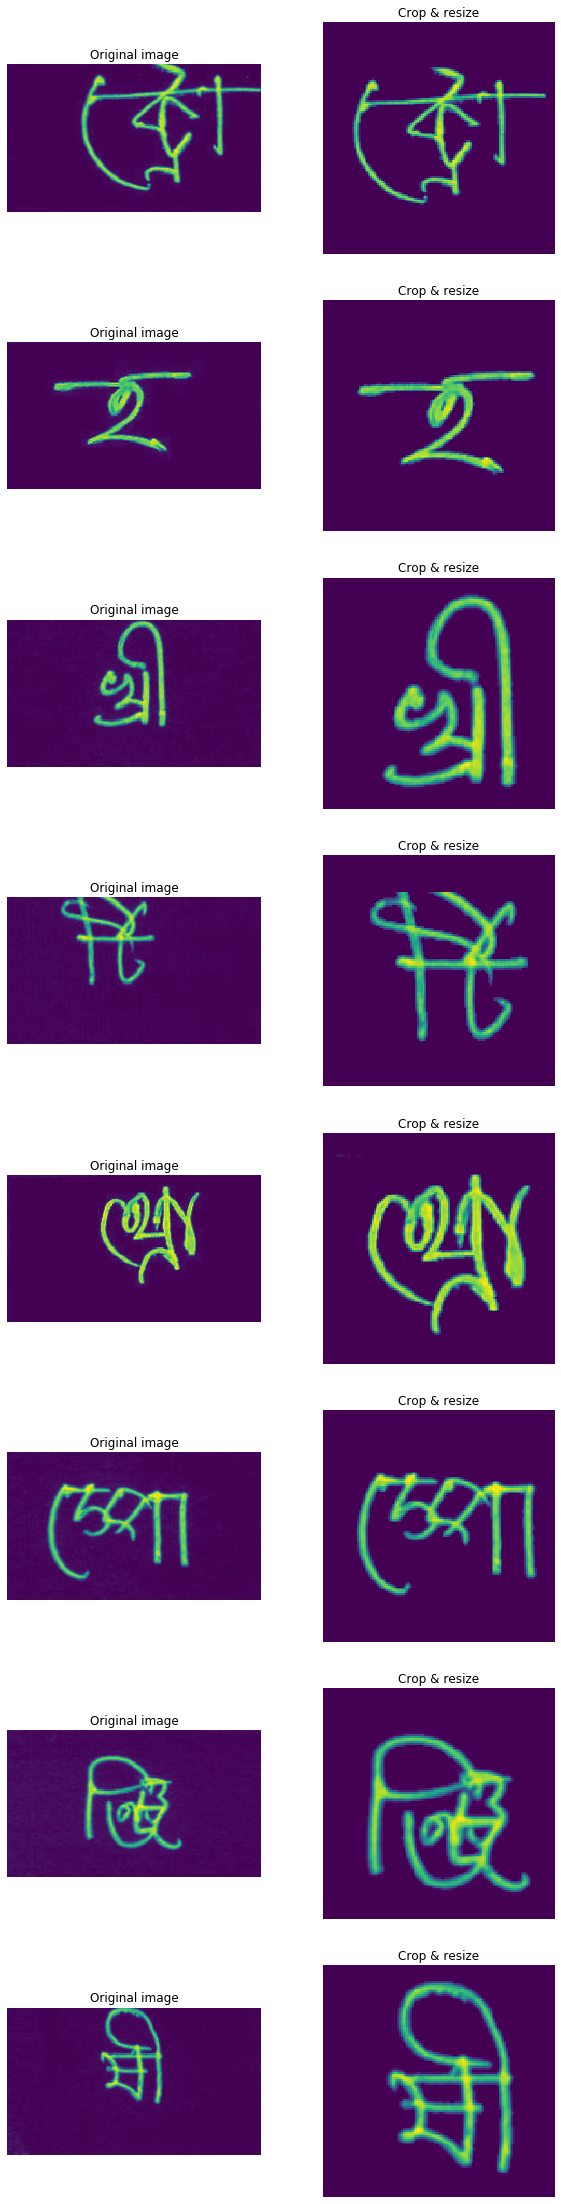

In [6]:
# demo
# convert to png and save externally
TRAIN = ['../data/train_image_data_0.parquet',
         '../data/train_image_data_1.parquet',
         '../data/train_image_data_2.parquet',
         '../data/train_image_data_3.parquet']

df = pd.read_parquet(TRAIN[0])
n_imgs = 8
fig, axs = plt.subplots(n_imgs, 2, figsize=(10, 5*n_imgs))

for idx in range(n_imgs):
    #somehow the original input is inverted
    img0 = 255 - df.iloc[idx, 1:].values.reshape(HEIGHT, WIDTH).astype(np.uint8)
    #normalize each image by its max val
    img = (img0*(255.0/img0.max())).astype(np.uint8)
    print(img.shape)
    img = crop_resize(img)

    axs[idx,0].imshow(img0)
    axs[idx,0].set_title('Original image')
    axs[idx,0].axis('off')
    axs[idx,1].imshow(img)
    axs[idx,1].set_title('Crop & resize')
    axs[idx,1].axis('off')
plt.show()

In [26]:
# convert to png and save externally
TRAIN = ['../data/train_image_data_0.parquet',
         '../data/train_image_data_1.parquet',
         '../data/train_image_data_2.parquet',
         '../data/train_image_data_3.parquet']

OUT_TRAIN = 'train.zip'

with zipfile.ZipFile(OUT_TRAIN, 'w') as img_out:
    for fname in TRAIN:
        df = pd.read_parquet(fname)
        #the input is inverted
        data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
        for idx in tqdm(range(len(df))):
            name = df.iloc[idx,0]
            #normalize each image by its max val
            img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
            img = crop_resize(img)

            img = cv2.imencode('.png',img)[1]
            img_out.writestr(name + '.png', img)

100%|██████████| 50210/50210 [00:35<00:00, 1425.25it/s]


In [4]:
train_df = pd.read_csv("../data/train.csv")


In [5]:
# convert to model input data format
TRAIN = ['../data/train_image_data_0.parquet']
#          '../data/train_image_data_1.parquet',
#          '../data/train_image_data_2.parquet',
#          '../data/train_image_data_3.parquet']


input_data_list = []

for fname in TRAIN:
    df = pd.read_parquet(fname)
    #the input is inverted
    data = 255 - df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH).astype(np.uint8)
    for idx in tqdm(range(len(df))):
        name = df.iloc[idx,0]
        #normalize each image by its max val
        img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)
        img = crop_resize(img)

        root, vowel, consonant = \
            train_df[train_df["image_id"] == name][["grapheme_root", "vowel_diacritic", "consonant_diacritic"]].values[0]
        
        input_data_list.append({
            "file_name": name,
            "image_array": img,
            "grapheme_root": root,
            "vowel_diacritic": vowel,
            "consonant_diacritic": consonant
        })

100%|██████████| 50210/50210 [07:55<00:00, 105.57it/s]


In [44]:
name = "Train_0"
a,b,v = train_df[train_df["image_id"] == name][["grapheme_root", "vowel_diacritic", "consonant_diacritic"]]

In [48]:
a = train_df[train_df["image_id"] == name][["grapheme_root", "vowel_diacritic", "consonant_diacritic"]]